In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [4]:
# Load the secret api key
with open('api_cred.json', 'r') as f:
    secrets = json.load(f)

api_key = "f677e7442d9b3235fd762f4cc97772c5"#secrets['api_key'] # you can hardcode your value here if you want

### Some example without Padas


In [52]:
seriesID = "UNRATE"   # Unemployment rate
start = "2015-01-01"  # start date
end = "2023-10-31"    # end date
units = "pc1"         # Percent change from a year ago

url = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id={seriesID}&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units={units}"

response = requests.get(url)

# print the response
print("response :", response)
"""
Here the response is <Response [200]> which means that the request was successful.
200 is the status code for a successful request.
"""
# print the status code
print("status code :", response.status_code)

# print the content
print("content :", response.content)
"""
Here the content is in byte format. 
We can decode it to utf-8 format.
But, as the reposnse is in json format, 
we can directly decode it to json format using the json() method from requests library
"""
# print the json content
print("json content :", response.json())

"""
The json response contains some keys like:
  - realtime_start
  - realtime_end
  - units
  ...
  - observations

The observations key contains the data we need.
The observation key contains a list of dictionaries. where two keys are interesting for us:
  - date, the date of the observation
  - value, the value of the observation
"""

# TODO: Given the response in json format, extract a list made of tuples where the first element is the date as str type and the second element is the value as float type
# Hint: use list comprehension
data = [(item['date'], float(item['value'])) for item in response.json()['observations']]
print("data :", data)


response : <Response [200]>
status code : 200
content : b'{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","observation_start":"2015-01-01","observation_end":"2023-10-31","units":"pc1","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":106,"offset":0,"limit":100000,"observations":[{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-01-01","value":"-13.63636"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-02-01","value":"-17.91045"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-03-01","value":"-19.40299"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-04-01","value":"-12.90323"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-05-01","value":"-11.11111"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-06-01","value":"-13.11475"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"

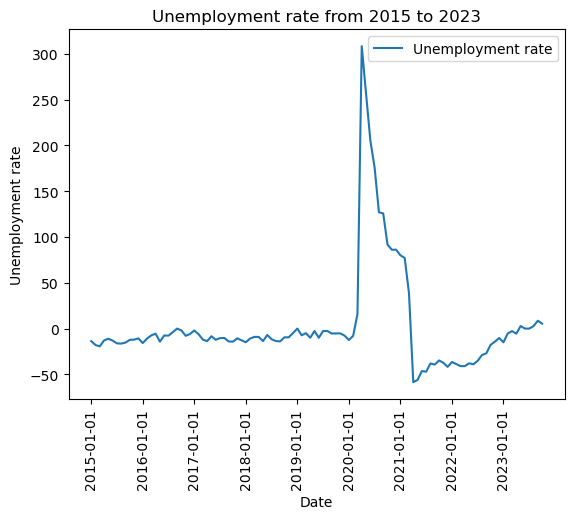

In [58]:
# Plotting the data
plt.plot([x[0] for x in data], [x[1] for x in data], label="Unemployment rate")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Unemployment rate")
plt.title("Unemployment rate from 2015 to 2023")
# show the x values only once per date
plt.xticks([x[0] for x in data][::12], rotation=90)
plt.show()

### Some example with Pandas

In [65]:
seriesID = "UNRATE"   # Unemployment rate
start = "2015-01-01"  # start date
end = "2023-10-31"    # end date
units = "pc1"         # Percent change from a year ago

url = "https://api.stlouisfed.org/fred/series/observations" + \
      f"?series_id={seriesID}&api_key={api_key}&file_type=json" + \
      f"&observation_start={start}&observation_end={end}&units={units}"

response = requests.get(url)

# print the response
print("response :", response)
"""
Here the response is <Response [200]> which means that the request was successful.
200 is the status code for a successful request.
"""
# print the status code
print("status code :", response.status_code)

# print the content
print("content :", response.content)
"""
Here the content is in byte format. 
We can decode it to utf-8 format.
But, as the reposnse is in json format, 
we can directly decode it to json format using the json() method from requests library
"""
# print the json content
print("json content :", response.json())

"""
The json response contains some keys like:
  - realtime_start
  - realtime_end
  - units
  ...
  - observations

The observations key contains the data we need.
The observation key contains a list of dictionaries. where two keys are interesting for us:
  - date, the date of the observation
  - value, the value of the observation
"""

"""
Here we use panda to get the same kind of data as before
We can see that is easier to use panda to get the data we want
We can see that we just need to create a DataFrame with the data we want 
"""
data = pd.DataFrame(response.json()['observations'])
print("dataframe :", data, sep="\n")
data = data[['date', 'value']]
print("dataframe[Date, Value] :", data, sep="\n")


response : <Response [200]>
status code : 200
content : b'{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","observation_start":"2015-01-01","observation_end":"2023-10-31","units":"pc1","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":106,"offset":0,"limit":100000,"observations":[{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-01-01","value":"-13.63636"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-02-01","value":"-17.91045"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-03-01","value":"-19.40299"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-04-01","value":"-12.90323"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-05-01","value":"-11.11111"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"2015-06-01","value":"-13.11475"},{"realtime_start":"2023-11-19","realtime_end":"2023-11-19","date":"

In [72]:
# Change the type of the columns
data['date'] = pd.to_datetime(data['date'])
data['value'] = pd.to_numeric(data['value'])
print("dataframe[Date, Value] :", data, sep="\n")

dataframe[Date, Value] :
          date     value
0   2015-01-01 -13.63636
1   2015-02-01 -17.91045
2   2015-03-01 -19.40299
3   2015-04-01 -12.90323
4   2015-05-01 -11.11111
..         ...       ...
101 2023-06-01   0.00000
102 2023-07-01   0.00000
103 2023-08-01   2.70270
104 2023-09-01   8.57143
105 2023-10-01   5.40541

[106 rows x 2 columns]


In [77]:
# change the name of the columns
data.columns = ['Date', 'Unemployment rate']
print("dataframe[Date, Unemployment rate] :", data, sep="\n")

dataframe[Date, Unemployment rate] :
          Date  Unemployment rate
0   2015-01-01          -13.63636
1   2015-02-01          -17.91045
2   2015-03-01          -19.40299
3   2015-04-01          -12.90323
4   2015-05-01          -11.11111
..         ...                ...
101 2023-06-01            0.00000
102 2023-07-01            0.00000
103 2023-08-01            2.70270
104 2023-09-01            8.57143
105 2023-10-01            5.40541

[106 rows x 2 columns]


#### Some pandas methods

In [73]:
# we can see the first 5 rows
print("dataframe.head() :", data.head(), sep="\n")
# we can see the last 5 rows
print("dataframe.tail() :", data.tail(), sep="\n")

dataframe.head() :
        date     value
0 2015-01-01 -13.63636
1 2015-02-01 -17.91045
2 2015-03-01 -19.40299
3 2015-04-01 -12.90323
4 2015-05-01 -11.11111
dataframe.tail() :
          date    value
101 2023-06-01  0.00000
102 2023-07-01  0.00000
103 2023-08-01  2.70270
104 2023-09-01  8.57143
105 2023-10-01  5.40541


In [74]:
# we can see the shape
print("dataframe.shape :", data.shape, sep="\n")
# we can see the columns
print("dataframe.columns :", data.columns, sep="\n")

dataframe.shape :
(106, 2)
dataframe.columns :
Index(['date', 'value'], dtype='object')


In [75]:
# we can see the index
print("dataframe.index :", data.index, sep="\n")
# we can see the dtypes
print("dataframe.dtypes :", data.dtypes, sep="\n")

dataframe.index :
RangeIndex(start=0, stop=106, step=1)
dataframe.dtypes :
date     datetime64[ns]
value           float64
dtype: object


In [76]:
# we can see the describe
print("dataframe.describe() :", data.describe(), sep="\n")
# we can see the info
print("dataframe.info() :", data.info(), sep="\n")

dataframe.describe() :
                                date       value
count                            106  106.000000
mean   2019-05-17 08:36:13.584905728    2.830329
min              2015-01-01 00:00:00  -58.503400
25%              2017-03-08 18:00:00  -14.741643
50%              2019-05-16 12:00:00  -10.102040
75%              2021-07-24 06:00:00   -3.063727
max              2023-10-01 00:00:00  308.333330
std                              NaN   56.970825
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    106 non-null    datetime64[ns]
 1   value   106 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB
dataframe.info() :
None


# Using a class for organizing the code

In [84]:
# class that will interact with the FRED API

class FredPy:
    def __init__(self, token=None):
      self.token = token
      self.url = "https://api.stlouisfed.org/fred/series/observations" + \
                  "?series_id={seriesID}&api_key={key}&file_type=json" + \
                  "&observation_start={start}&observation_end={end}&units={units}"

    def set_token(self, token):
      self.token = token

    def get_series(self, seriesID, start, end, units, pandas=True):
      # The URL string with the values inserted into it
      url_formatted = self.url.format(
          seriesID=seriesID, start=start, end=end, units=units, key=self.token
      )
      response = requests.get(url_formatted)

      if(pandas):
          # If the response was successful, extract the data from it
        if(response.status_code == 200):
          return pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                    .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                    .assign(value = lambda cols: cols['value'].astype(float))\
                    .rename(columns = {'value': seriesID})
        
        raise Exception("Bad response from API, status code = {}".format(response.status_code))
      return response

In [85]:
# Instantiate fredpy object
fredpy = FredPy()
# Set the API key
fredpy.set_token(api_key)


In [86]:
# Test getting the GDP series
data = fredpy.get_series(
    seriesID = 'GDP', 
    start = '2005-01-01',
    end = '2021-12-01', 
    units = 'pc1'
)

In [87]:
# Let's get the unemployment rate data
unemployment_data = fredpy.get_series(
    seriesID="UNRATE", 
    start = '2005-01-01',
    end = '2021-12-01', 
    units = 'lin'
)

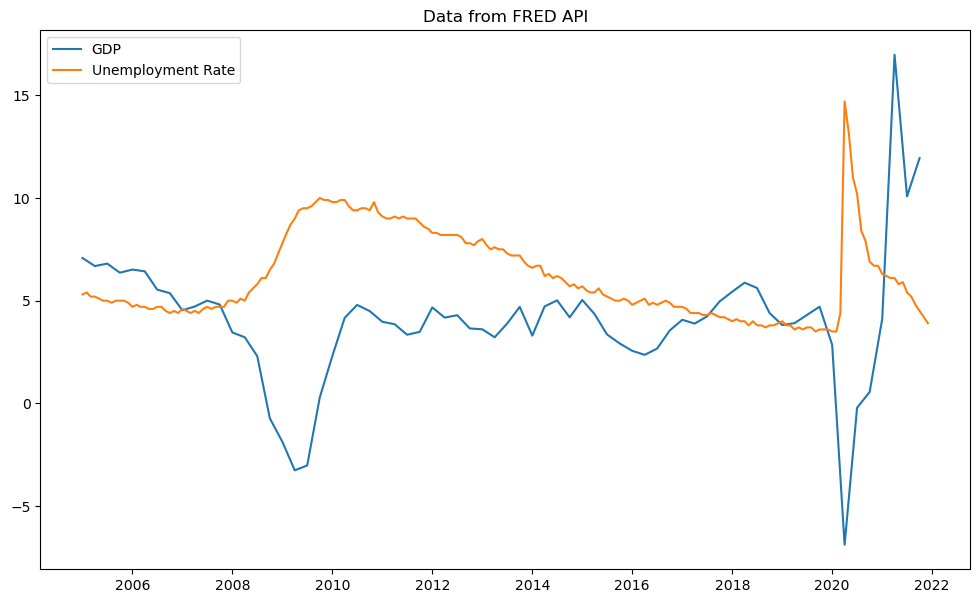

In [88]:
# visualize the series
plt.figure(figsize = (12, 7))
plt.plot(data['date'], data['GDP'], label="GDP")
plt.plot(unemployment_data['date'], unemployment_data['UNRATE'], label="Unemployment Rate")
plt.legend()
plt.title("Data from FRED API")
plt.show()